# ML Devellopemnt Cycle 

1.Read the data
2.Preprocessing
    -filling missing values
    -EDA - Exploratory Data Analtsis
3.Model Building
4.Model Evaluation
5.Deployment or Production

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [7]:
df = pd.read_csv("C:\\Users\\Varun\\Downloads\\archive (4)\\train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [12]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [13]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

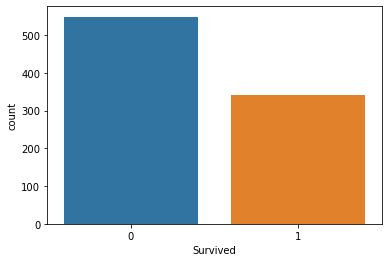

In [15]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

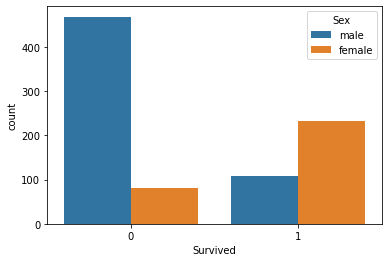

In [16]:
sns.countplot(x='Survived',hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

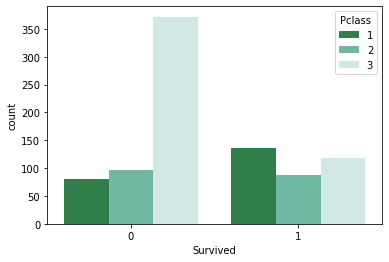

In [17]:
sns.countplot(x='Survived',hue="Pclass",data=df,palette='BuGn_r')

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

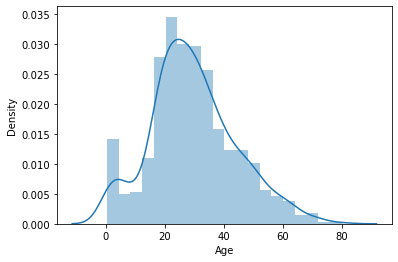

In [18]:
sns.distplot(df['Age'].dropna(),kde=True)

<AxesSubplot:>

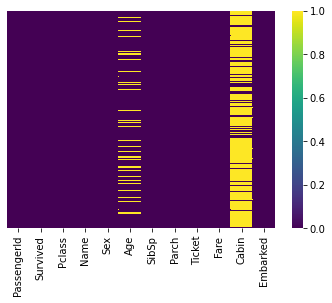

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

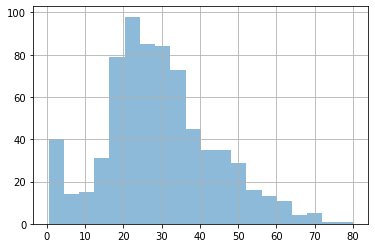

In [20]:
df['Age'].hist(alpha=0.5,bins=20)

<AxesSubplot:>

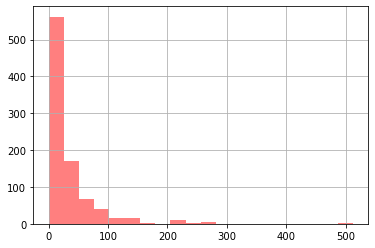

In [21]:
df['Fare'].hist(color="red",alpha=0.5,bins=20)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

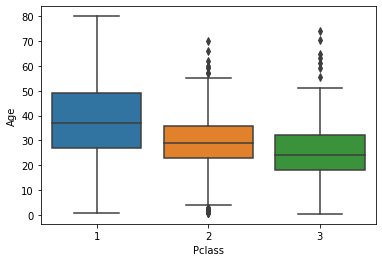

In [23]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [24]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df.Age = df.Age.fillna(df.Age.median())

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [29]:
df.Embarked =df.Embarked.bfill()

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [32]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)
df

Survived  Pclass     Sex   Age Embarked
0           0       3    male  22.0        S
1           1       1  female  38.0        C
2           1       3  female  26.0        S
3           1       1  female  35.0        S
4           0       3    male  35.0        S
..        ...     ...     ...   ...      ...
886         0       2    male  27.0        S
887         1       1  female  19.0        S
888         0       3  female  28.0        S
889         1       1    male  26.0        C
890         0       3    male  32.0        Q

[891 rows x 5 columns]

In [33]:
df1 = pd.get_dummies(df['Sex'],drop_first=True)
df2 = pd.get_dummies(df['Embarked'],drop_first=True)

In [34]:
df1

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

In [35]:
df2

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [36]:
df

Survived  Pclass     Sex   Age Embarked
0           0       3    male  22.0        S
1           1       1  female  38.0        C
2           1       3  female  26.0        S
3           1       1  female  35.0        S
4           0       3    male  35.0        S
..        ...     ...     ...   ...      ...
886         0       2    male  27.0        S
887         1       1  female  19.0        S
888         0       3  female  28.0        S
889         1       1    male  26.0        C
890         0       3    male  32.0        Q

[891 rows x 5 columns]

In [37]:
df1

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

In [38]:
df2

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [39]:
df

Survived  Pclass     Sex   Age Embarked
0           0       3    male  22.0        S
1           1       1  female  38.0        C
2           1       3  female  26.0        S
3           1       1  female  35.0        S
4           0       3    male  35.0        S
..        ...     ...     ...   ...      ...
886         0       2    male  27.0        S
887         1       1  female  19.0        S
888         0       3  female  28.0        S
889         1       1    male  26.0        C
890         0       3    male  32.0        Q

[891 rows x 5 columns]

In [40]:
df = df.join([df1,df2])
df

Survived  Pclass     Sex   Age Embarked  male  Q  S
0           0       3    male  22.0        S     1  0  1
1           1       1  female  38.0        C     0  0  0
2           1       3  female  26.0        S     0  0  1
3           1       1  female  35.0        S     0  0  1
4           0       3    male  35.0        S     1  0  1
..        ...     ...     ...   ...      ...   ... .. ..
886         0       2    male  27.0        S     1  0  1
887         1       1  female  19.0        S     0  0  1
888         0       3  female  28.0        S     0  0  1
889         1       1    male  26.0        C     1  0  0
890         0       3    male  32.0        Q     1  1  0

[891 rows x 8 columns]

In [41]:
df = df.drop(['Sex','Embarked'],axis=1)
df

Survived  Pclass   Age  male  Q  S
0           0       3  22.0     1  0  1
1           1       1  38.0     0  0  0
2           1       3  26.0     0  0  1
3           1       1  35.0     0  0  1
4           0       3  35.0     1  0  1
..        ...     ...   ...   ... .. ..
886         0       2  27.0     1  0  1
887         1       1  19.0     0  0  1
888         0       3  28.0     0  0  1
889         1       1  26.0     1  0  0
890         0       3  32.0     1  1  0

[891 rows x 6 columns]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# model building

In [45]:
model1 = LogisticRegression(random_state=0)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [46]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [47]:
print("By Logistic Regression = ",accuracy_score(y_test,y_pred))

By Logistic Regression =  0.7873134328358209


In [48]:
model2 = SVC(C=6,gamma='auto',kernel='rbf')
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("By SVM = ",accuracy_score(y_test,y_pred))

By SVM =  0.8059701492537313


In [49]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print("By RandomForest Classifier = ",accuracy_score(y_test,y_pred))

By RandomForest Classifier =  0.8059701492537313


In [50]:
confusion_matrix(y_test,y_pred)

array([[139,  19],
       [ 33,  77]], dtype=int64)

In [51]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84       158\n           1       0.80      0.70      0.75       110\n\n    accuracy                           0.81       268\n   macro avg       0.81      0.79      0.79       268\nweighted avg       0.81      0.81      0.80       268\n'

In [52]:
model1 = LogisticRegression(penalty='l2')
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("By Logistic Regression = ",accuracy_score(y_test,y_pred))

By Logistic Regression =  0.7873134328358209


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cross_val_score(SVC(C=10,gamma='auto',kernel="linear"),X,y,cv=5)

array([0.80446927, 0.80337079, 0.78651685, 0.75280899, 0.78651685])

In [55]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True)

gs.fit(X,y)
gs.cv_results_

{'mean_fit_time': array([0.13799477, 0.16406274, 0.12890685, 0.16797066, 0.11328286,
        0.40625131, 0.11718732, 0.41015697, 0.10937858, 0.50023139,
        0.1139459 , 0.50711721, 0.12500143, 0.64843678, 0.1120308 ,
        0.7490378 , 0.12375534, 1.0052557 , 0.18600768, 1.34881878,
        0.18475914, 1.00264639, 0.22801274, 2.22512066, 0.27001184,
        1.9708693 , 0.21519905, 1.51736623]),
 'std_fit_time': array([2.28593498e-02, 3.40534605e-02, 6.76644292e-03, 2.78926660e-02,
        6.76393110e-03, 8.34143277e-02, 7.81554034e-03, 7.84143099e-02,
        1.18011176e-06, 8.59803935e-02, 9.18803243e-03, 7.00286465e-02,
        1.10485436e-02, 8.37786173e-02, 4.59778541e-03, 1.65389259e-01,
        5.54072442e-03, 3.46649541e-01, 3.25437039e-02, 3.58547605e-01,
        4.49063717e-02, 7.31837264e-02, 9.04519214e-02, 1.45598020e+00,
        1.29616503e-01, 3.61461198e-01, 3.33453205e-02, 2.88955421e-01]),
 'mean_score_time': array([0.06180942, 0.02734369, 0.07031095, 0.02734393, 

In [56]:
df1 = pd.DataFrame(gs.cv_results_)
df1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.137995      0.022859         0.061809        0.001196       1   
1        0.164063      0.034053         0.027344        0.006765       1   
2        0.128907      0.006766         0.070311        0.007814       1   
3        0.167971      0.027893         0.027344        0.006765       1   
4        0.113283      0.006764         0.050779        0.006766       4   
5        0.406251      0.083414         0.027346        0.006767       4   
6        0.117187      0.007816         0.062501        0.000005       4   
7        0.410157      0.078414         0.027344        0.006769       4   
8        0.109379      0.000001         0.054683        0.007811       5   
9        0.500231      0.085980         0.027526        0.006454       5   
10       0.113946      0.009188         0.063502        0.001064       5   
11       0.507117      0.070029         0.027344        0.006767       5   
12       0.125001      0.011049         0.050779        0.006766       6   
13       0.648437      0.083779         0.031252        0.000004       6   
14       0.112031      0.004598         0.063126        0.001085       6   
15       0.749038      0.165389         0.027754        0.004766       6   
16       0.123755      0.005541         0.047754        0.001090       7   
17       1.005256      0.346650         0.025631        0.003695       7   
18       0.186008      0.032544         0.134509        0.062800       7   
19       1.348819      0.358548         0.030253        0.004761       7   
20       0.184759      0.044906         0.069006        0.027993       8   
21       1.002646      0.073184         0.042502        0.020159       8   
22       0.228013      0.090452         0.110757        0.024823       8   
23       2.225121      1.455980         0.062506        0.036807       8   
24       0.270012      0.129617         0.085756        0.026477      10   
25       1.970869      0.361461         0.052031        0.025411      10   
26       0.215199      0.033345         0.125112        0.040641      10   
27       1.517366      0.288955         0.051066        0.031292      10   

   param_gamma param_kernel                                           params  \
0         auto          rbf       {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}   
1         auto       linear    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
2        scale          rbf      {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
3        scale       linear   {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}   
4         auto          rbf       {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}   
5         auto       linear    {'C': 4, 'gamma': 'auto', 'kernel': 'linear'}   
6        scale          rbf      {'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}   
7        scale       linear   {'C': 4, 'gamma': 'scale', 'kernel': 'linear'}   
8         auto          rbf       {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}   
9         auto       linear    {'C': 5, 'gamma': 'auto', 'kernel': 'linear'}   
10       scale          rbf      {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}   
11       scale       linear   {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}   
12        auto          rbf       {'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}   
13        auto       linear    {'C': 6, 'gamma': 'auto', 'kernel': 'linear'}   
14       scale          rbf      {'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}   
15       scale       linear   {'C': 6, 'gamma': 'scale', 'kernel': 'linear'}   
16        auto          rbf       {'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}   
17        auto       linear    {'C': 7, 'gamma': 'auto', 'kernel': 'linear'}   
18       scale          rbf      {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}   
19       scale       linear   {'C': 7, 'gamma': 'scale', 'kernel': 'linear'}   
20        auto          rbf       {'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}   
21        auto       linear    {'C': 8,

In [57]:
df1[['param_C','param_gamma','param_kernel','mean_test_score']]

param_C param_gamma param_kernel  mean_test_score
0        1        auto          rbf         0.783390
1        1        auto       linear         0.786748
2        1       scale          rbf         0.636377
3        1       scale       linear         0.786748
4        4        auto          rbf         0.802458
5        4        auto       linear         0.786748
6        4       scale          rbf         0.759862
7        4       scale       linear         0.786748
8        5        auto          rbf         0.803589
9        5        auto       linear         0.786748
10       5       scale          rbf         0.761004
11       5       scale       linear         0.786748
12       6        auto          rbf         0.804711
13       6        auto       linear         0.786748
14       6       scale          rbf         0.760978
15       6       scale       linear         0.786748
16       7        auto          rbf         0.804711
17       7        auto       linear         0.786748
18       7       scale          rbf         0.787889
19       7       scale       linear         0.786748
20       8        auto          rbf         0.804711
21       8        auto       linear         0.786748
22       8       scale          rbf         0.787884
23       8       scale       linear         0.786748
24      10        auto          rbf         0.810326
25      10        auto       linear         0.786748
26      10       scale          rbf         0.791253
27      10       scale       linear         0.786748

In [58]:
gs.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [59]:
gs.best_score_

0.810326021088353

In [60]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True,n_iter=4)

rs.fit(X,y)
rs.cv_results_

{'mean_fit_time': array([0.73578352, 0.13757336, 0.81951958, 0.95213819]),
 'std_fit_time': array([0.06503332, 0.01813929, 0.36843715, 0.11105084]),
 'mean_score_time': array([0.05195194, 0.07726425, 0.02506459, 0.01953709]),
 'std_score_time': array([0.01226837, 0.02861747, 0.00960177, 0.00676328]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'linear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'auto', 'scale', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[4, 8, 5, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'gamma': 'scale', 'C': 4},
  {'kernel': 'rbf', 'gamma': 'auto', 'C': 8},
  {'kernel': 'linear', 'gamma': 'scale', 'C': 5},
  {'kernel': 'linear', 'gamma': 'auto', 'C': 10}],

In [61]:
df2 = pd.DataFrame(rs.cv_results_)
df2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.735784      0.065033         0.051952        0.012268       linear   
1       0.137573      0.018139         0.077264        0.028617          rbf   
2       0.819520      0.368437         0.025065        0.009602       linear   
3       0.952138      0.111051         0.019537        0.006763       linear   

  param_gamma param_C                                          params  \
0       scale       4  {'kernel': 'linear', 'gamma': 'scale', 'C': 4}   
1        auto       8      {'kernel': 'rbf', 'gamma': 'auto', 'C': 8}   
2       scale       5  {'kernel': 'linear', 'gamma': 'scale', 'C': 5}   
3        auto      10  {'kernel': 'linear', 'gamma': 'auto', 'C': 10}   

   split0_test_score  split1_test_score  ...  split3_test_score  \
0           0.798206           0.807175  ...           0.779279   
1           0.766816           0.816143  ...           0.801802   
2           0.798206           0.807175  ...           0.779279   
3           0.798206           0.807175  ...           0.779279   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.786748        0.017324                2            0.782934   
1         0.804711        0.024687                1            0.898204   
2         0.786748        0.017324                2            0.782934   
3         0.786748        0.017324                2            0.782934   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.779940            0.794910            0.789238   
1            0.884731            0.877246            0.881913   
2            0.779940            0.794910            0.789238   
3            0.779940            0.794910            0.789238   

   mean_train_score  std_train_score  
0          0.786756         0.005782  
1          0.885523         0.007794  
2          0.786756         0.005782  
3          0.786756         0.005782  

[4 rows x 21 columns]

In [62]:
df2[['param_C','param_gamma','param_kernel','mean_test_score']]

param_C param_gamma param_kernel  mean_test_score
0       4       scale       linear         0.786748
1       8        auto          rbf         0.804711
2       5       scale       linear         0.786748
3      10        auto       linear         0.786748

In [63]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 8}